In [1]:
import os
import gzip
from collections import defaultdict, Counter
import multiprocessing as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import *
import pysam
from pyBioInfo.IO.File import GffFile, BedFile
from pyBioInfo.Utils import ShiftLoader

[92, 179, 131, 117, 117, 118, 124]
[119, 271, 309, 255, 235, 219, 222]


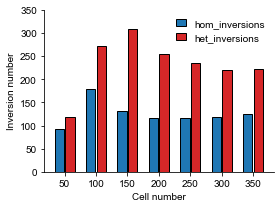

In [2]:
def load_inversions(path):
    invs = defaultdict(list)
    with gzip.open(path, "rt") as f:
        for line in f:
            row = line.strip("\n").split("\t")
            chrom, start, end = row[:3]
            start, end = int(start), int(end)
            c, w, r = row[3].split(";")
            c = int(c)
            w = int(w)
            if c + w < 20:
                continue
            r = w / (c + w)
            if r >= 0.9:
                t = "HOM"
            elif r > 0.6:
                continue
            elif r >= 0.4:
                t = "HET"
            else:
                continue
            invs[chrom].append([start, end, c ,w, r, t])
    return invs

ncells = [50, 100, 150, 200, 250, 300, 350]
data = dict()
for ncell in ncells:
    path = "../../4_NanoStrandSeq_Phasing/results/HG001_Cell_%s/inversions.v2/inversions.bed.gz" % ncell
    invs = load_inversions(path)
    data[ncell] = invs

xs = np.arange(len(ncells))
ys1 = []
ys2 = []
for ncell in ncells:
    count1, count2 = 0, 0 # HOM, HET
    for chrom, invs in data[ncell].items():
        for inv in invs:
            if inv[5] == "HOM":
                count1 += 1
            else:
                count2 += 1
    ys1.append(count1)
    ys2.append(count2)

plt.figure(figsize=(4, 3))
print(ys1)
print(ys2)
plt.bar(xs - 0.17, ys1, width=0.3, edgecolor="black", label="hom_inversions", color="C0")
plt.bar(xs + 0.17, ys2, width=0.3, edgecolor="black", label="het_inversions", color="C3")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Cell number")
plt.ylabel("Inversion number")
plt.xticks(xs, ncells)
plt.ylim(0, 350)
plt.legend(handlelength=1, frameon=False)
plt.tight_layout()
# plt.savefig("figures/inversion_number.pdf", dpi=300)

3707 51710 25185.130434782608
1601 97664 19206.823529411766
2037 292218 56798.9720670391
1601 148629 22502.18450184502
2037 1213156 85896.07633587786
1350 207343 26913.30420711974
2037 3572869 98554.79487179487
1350 559785 36241.35294117647
2037 3572869 101496.21367521367
1350 584188 42255.4
2037 3572869 100900.55084745762
1350 585733 46424.100456621
2827 3572869 92000.40322580645
1350 586725 47106.61261261261


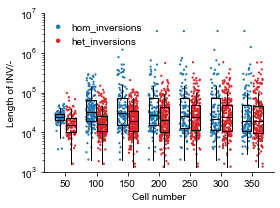

In [3]:
xs = np.arange(len(ncells))
width = 0.3
gap = 0.03

plt.figure(figsize=(4, 3))
for x, ncell in enumerate(ncells):
    ys = list()
    for chrom, invs in data[ncell].items():
        for inv in invs:
            if inv[5] == "HOM":
                ys.append(inv[1] - inv[0])
    print(min(ys), max(ys), np.mean(ys))
    plt.boxplot([ys], positions=[x - width / 2 - gap], widths=width, showfliers=False, medianprops={"color": "black"}, showcaps=False)
    label = None
    if x == 0:
        label = "hom_inversions"
    plt.scatter(np.random.random(len(ys)) * width - width + x - gap, ys, marker=".", s=20, edgecolor="none", alpha=1, color="C0", label=label)

    ys = list()
    for chrom, invs in data[ncell].items():
        for inv in invs:
            if inv[5] == "HET":
                ys.append(inv[1] - inv[0])
    print(min(ys), max(ys), np.mean(ys))
    plt.boxplot([ys], positions=[x + width / 2 + gap], widths=width, showfliers=False, medianprops={"color": "black"}, showcaps=False)
    label = None
    if x == 0:
        label = "het_inversions"
    plt.scatter(np.random.random(len(ys)) * width + x + gap, ys, marker=".", s=20, edgecolor="none", alpha=1, color="C3", label=label)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(xs, ncells)
plt.xlabel("Cell number")
plt.ylabel("Length of INV/-")
plt.ylim(1e3, 1e7)
plt.gca().set_yscale("log", base=10)
plt.legend(markerscale=2, frameon=False, handlelength=1)
plt.tight_layout()
# plt.savefig("figures/inversion_length.pdf", dpi=300)